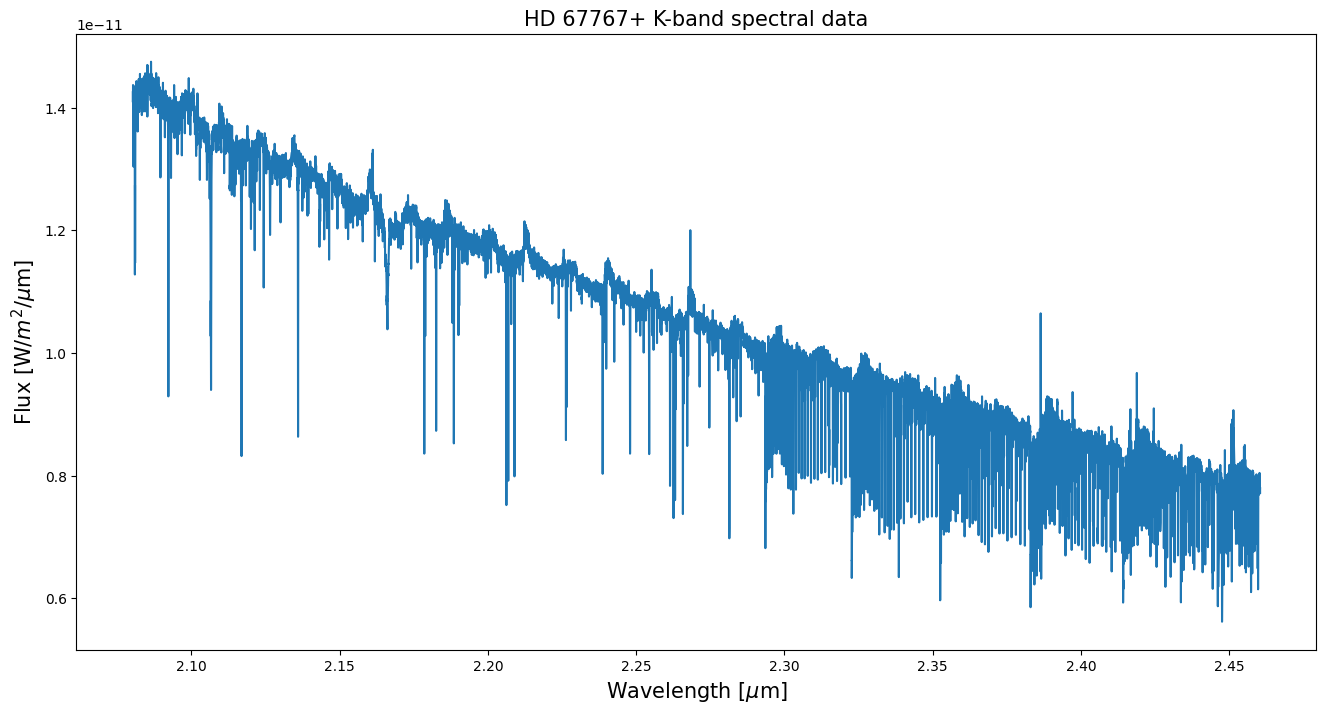

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii as ascii
from scipy.optimize import curve_fit

# data: IGRINS HD67767+ K band spectrum
file = 'HD67767_G7_V_K.txt'

data = ascii.read(file, 'r')

wavelength = np.array(data['col1'])
flux = np.array(data['col2'])
error = np.array(data['col3'])

plt.figure(figsize=(16, 8))
plt.plot(wavelength, flux)

plt.title('HD 67767+ K-band spectral data', fontsize=15)
plt.xlabel('Wavelength [$\mu$m]', fontsize=15)
plt.ylabel('Flux [W/$m^2$/$\mu$m]', fontsize=15)


plt.show()

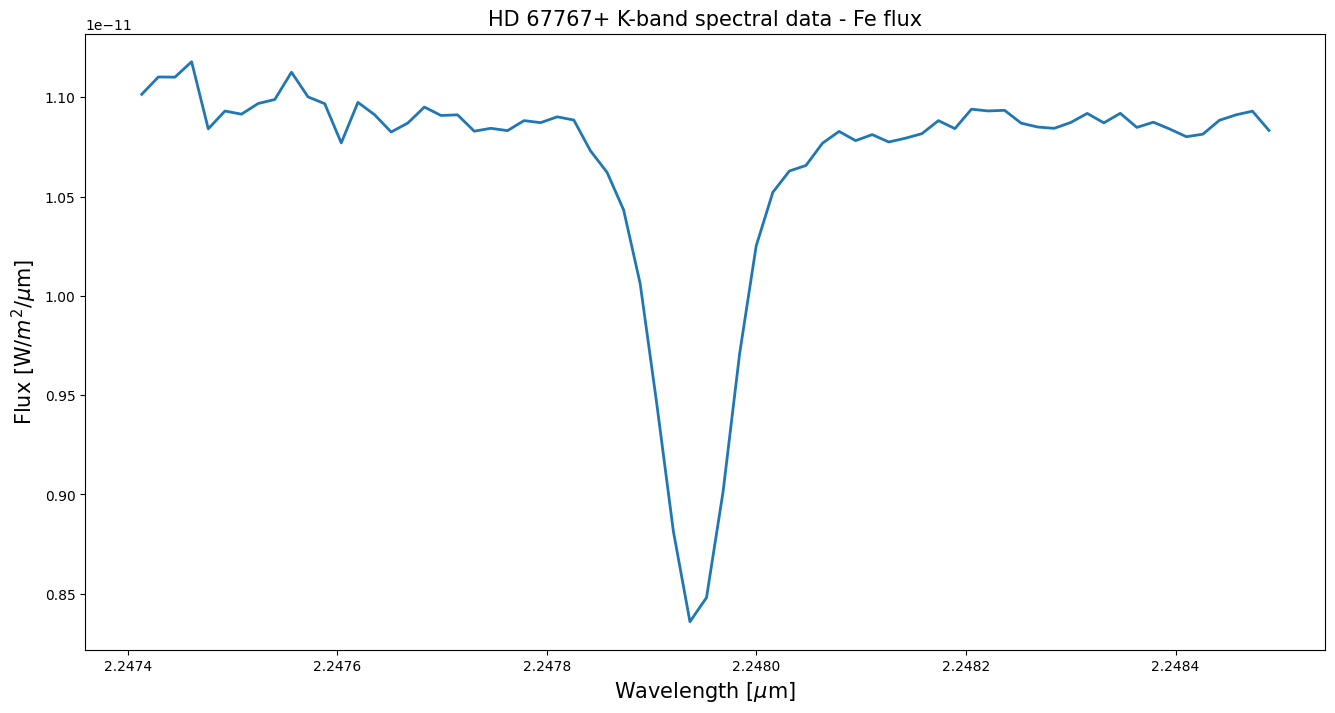

In [15]:
# Fe abosoption wavelength: 2.2479 um
a = 2.2474
b = 2.2485

arange = np.where((wavelength>=a) & (wavelength<=b))

fe_wavelength = wavelength[arange]
fe_flux = flux[arange]
fe_error = error[arange]

plt.figure(figsize=(16, 8))
plt.plot(fe_wavelength, fe_flux, linewidth=2)
plt.title('HD 67767+ K-band spectral data - Fe flux', fontsize=15)
plt.xlabel('Wavelength [$\mu$m]', fontsize=15)
plt.ylabel('Flux [W/$m^2$/$\mu$m]', fontsize=15)
plt.show()

In [4]:
# define gauss distribution function 
def gauss(x, const, a, b, c):
    T = (x - b) / c
    exp = np.exp(-(T**2)/2)
    y = const - (a * exp)
    return y

In [5]:
opt, cov = curve_fit(gauss, fe_wavelength, fe_flux, p0=[1.10, 0.3, 2.2479, 0.00005])

In [6]:
print("Background spectrum: ", opt[0])
print("Height: ", opt[1])
print("Center: ", opt[2])
print("Width: ", opt[3])

Background spectrum:  1.08667610121603e-11
Height:  2.4629408542055564e-12
Center:  2.2479416282398583
Width:  3.5861361174797895e-05


In [7]:
x_fit = np.linspace(a, b, 1000)
y_fit = gauss(x_fit, opt[0], opt[1], opt[2], opt[3])

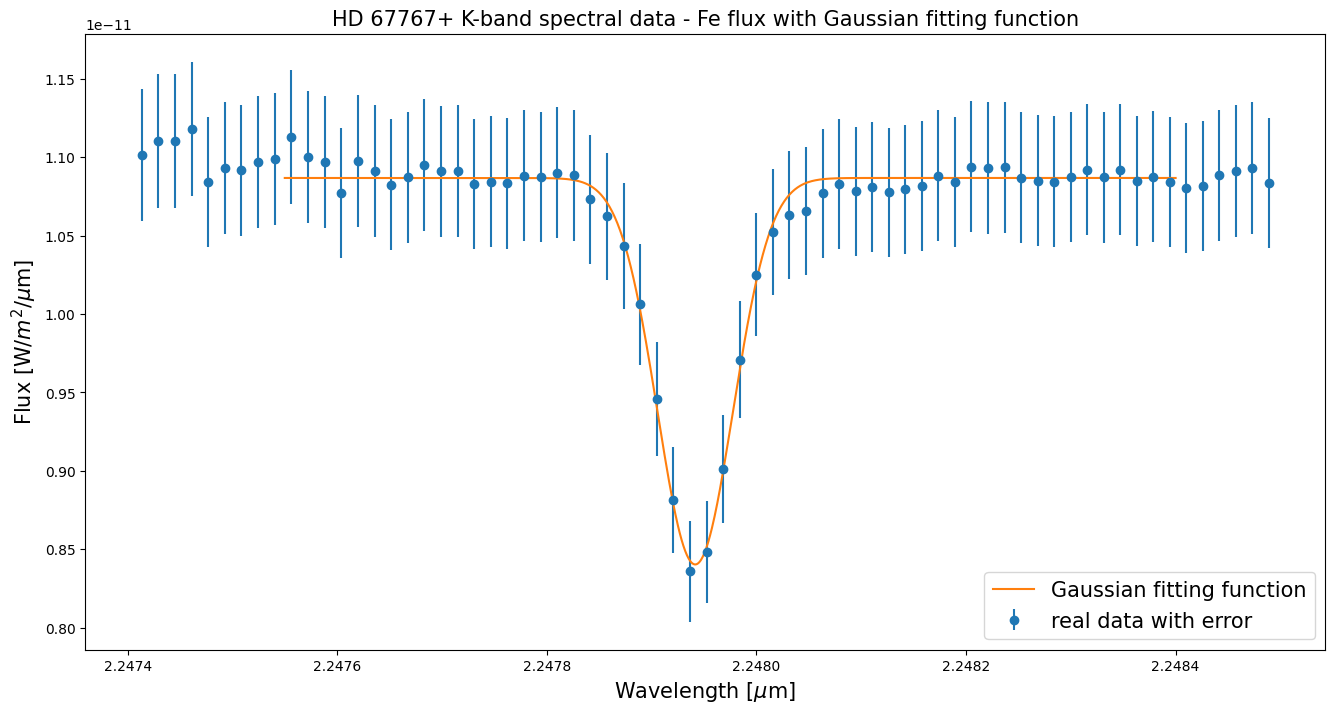

In [16]:
plt.figure(figsize=(16, 8))
plt.errorbar(fe_wavelength, fe_flux, fe_error, fmt='o', label='real data with error')
plt.plot(x_fit, y_fit, linestyle='-', label='Gaussian fitting function')
plt.title('HD 67767+ K-band spectral data - Fe flux with Gaussian fitting function', fontsize=15)
plt.xlabel('Wavelength [$\mu$m]', fontsize=15)
plt.ylabel('Flux [W/$m^2$/$\mu$m]', fontsize=15)
plt.legend(loc='lower right', fontsize=15)
plt.show()